[[1.87      0.       ]
 [0.        2.0470717]]
[1200 1200]
[641.71122995 586.20320856]
Friday's Total Utility: 12.009228261428198
Initial Mass of the Crusonia Plant: 1200.0
  Period       Consumption
   Today  641.711229946524
Tomorrow 586.2032085561498


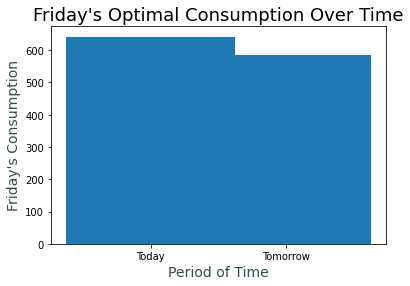

In [113]:
#Two-Period Crusonia Model
import numpy as np
import math
import matplotlib.pyplot as plt
import pandas as pd


#Friday's Uility Function; The Objective Function
def u(c1, c2):
    return math.log(c1) + ß*math.log(c2) 
#The Crusonia Plant's Budget Constraint; The Constraint
def c(c1, c2):
    return c1 + c2/π


#Parameters:
ß = 0.87
π = 1.05
c0 = 1200


#System of Equations for the Optimal Bundle:
#I derived these equations from the revelent Euler-Lagrange equations.
A = np.array([[1+ß,0], [0,(1+ß)/(ß*π)]])
B = np.array([c0,c0])
C = np.linalg.solve(A, B)

#Optimal Choice in Periods 1 and 2:
c1 = C[0]
c2 = C[1]


#Printing the Results: 
print("Friday makes the best use of his Crusonia plant when he consumes" c1 "units of Crusonia today and" c2 "units of Crusonia tomorrow.")
print("Friday's Total Utility:", u(c1, c2))
print('Initial Mass of the Crusonia Plant:', c(c1, c2))


#Graph of Friday's Consumption Across Time:
x = np.array(["Today", "Tomorrow"])
y = np.array([c1, c2])

twoperioddf = pd.DataFrame(data=np.column_stack((x,y)),columns=['Period',"Consumption"])
print(twoperioddf.to_string(index=False))

plt.bar(x,y, width=1.25)

font1 = {'family':'MS Reference Sans Serif', 'color':'darkslategray','size':14}
font2 = {'family':'MS Reference Specialty', 'color':'black','size':18}

plt.xlabel("Period of Time",  fontdict = font1)
plt.ylabel("Friday's Consumption",  fontdict = font1)
plt.title("Friday's Optimal Consumption Over Time", fontdict = font2)
plt.show()

In [115]:
print(c1)
print(c2)

c(c1, c2)

641.711229946524
586.2032085561498


1200.0

C:\Users\harri\AppData\Local\Temp/ipykernel_8188/2087536921.py:26: RuntimeWarning: invalid value encountered in log
  F = np.log(X) + ß*np.log(Y) - u(c1, c2)  #Implicit equation for the indifference curve


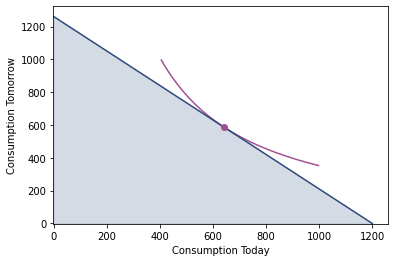

In [112]:
#Plotting the Budget Constraint and the Indifference Curve of the Optimal Level of Utility:


#Plotting the  Crusonia Plant's Budget Constraint:
def B(c1):
    return π*(c0 - c1) #I define Friday's consumption tomorrow as a function of his consumption today


def plot_constraint(ax, c0, π):
    c1_bc = np.array([0, c0])
    c2 = B(c1_bc)
    ax.plot(c1_bc, c2, color='#2f4b7c')
    ax.fill_between(c1_bc, 0, c2, color='#2f4b7c', alpha=0.2)
    ax.set_xlabel("Consumption Today")
    ax.set_ylabel("Consumption Tomorrow")
    return ax

fig, ax = plt.subplots()
plot_constraint(ax, c0, 1/π)

plt.plot(c1, c2, 'o', color='#a05195')
plt.subplot() 
xlist = np.linspace(-2.0, 1000.0, 100) # Create 1-D arrays for x,y dimensions
ylist = np.linspace(-2.0, 1000.0, 100) 
X,Y = np.meshgrid(xlist, ylist) # Create 2-D grid xlist,ylist values
F = np.log(X) + ß*np.log(Y) - u(c1, c2)  #Implicit equation for the indifference curve
plt.contour(X, Y, F, [0], colors = '#a05195', linestyles = 'solid')
plt.show()